In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, MaxPooling2D, Deconvolution2D, UpSampling2D
import os
import random
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from keras import regularizers

Using TensorFlow backend.


In [5]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train.shape

(60000, 28, 28, 1)

In [3]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2))(x)

# FC
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
encoded = Dense(512, activation='relu', activity_regularizer=regularizers.l1(10e-10))(x)

x = Dense(512, activation='relu')(encoded)
x = Dense(1024, activation='relu')(x)
x = Dense(3136, activation='sigmoid')(x)
x = Reshape((7, 7, 64))(x)

#CONV

x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
decoded = Conv2D(1, (1, 1), padding="same")(x)

model = Model(inputs=input_img, outputs=decoded)

In [4]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248

In [6]:
loaded_model.compile(optimizer='adam', loss="mse")

In [66]:
loaded_model.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 239s 4ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 2/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 3/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 4/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0061 - val_loss: 0.0074
Epoch 5/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 6/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 7/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0059 - val_loss: 0.0073
Epoch 8/10
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 9/10
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0057 - val_loss: 0.0

In [17]:
input_img = loaded_model.get_layer("input_1").input
encoded = loaded_model.get_layer("dense_2").output

In [18]:
encoder = Model(inputs=input_img, outputs=encoded)

In [19]:
sample_x, sample_y = x_train[:20], y_train[:20]
sample_x, sample_y = np.squeeze(sample_x), np.squeeze(sample_y)

In [21]:
%matplotlib inline
print(sample_y)
def show_sample(ind):
    plt.figure()
    plt.imshow(sample_x[ind])
    plt.figure()
    pred = loaded_model.predict(np.expand_dims(np.expand_dims(sample_x[ind], axis=2), axis=0))
    plt.imshow(np.squeeze(pred))
    
interact(show_sample,ind=widgets.IntSlider(min=0, max=19, step=1, value=5))

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


interactive(children=(IntSlider(value=5, description='ind', max=19), Output()), _dom_classes=('widget-interact…

<function __main__.show_sample(ind)>

In [22]:
from sklearn import manifold, datasets

In [23]:
import matplotlib.colors as mcolors
color_set = mcolors.TABLEAU_COLORS
cnames = list(color_set.keys())

In [24]:
encoded_samp = encoder.predict(x_train[:10000])

In [25]:
tsne = manifold.TSNE(n_components=3, init='random', perplexity=400, n_jobs=-1, verbose=1)

In [53]:
embedded_samp = tsne.fit_transform(encoded_samp)

[t-SNE] Computing 1201 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.471s...
[t-SNE] Computed neighbors for 10000 samples in 14.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.072002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.815857
[t-SNE] KL divergence after 1000 iterations: 0.634184


In [29]:
clist = [color_set[cnames[label]] for label in y_train[:10000]]

In [58]:
from mpl_toolkits import mplot3d
%matplotlib inline

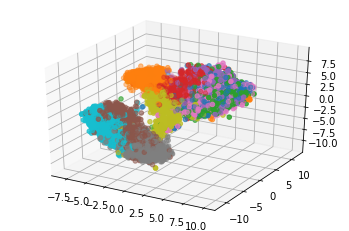

In [59]:
# 2D
# embedded_x, embedded_y = np.split(embedded_samp, 2, axis=1)
# plt.scatter(embedded_x, embedded_y, c=clist)

# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

embedded_x, embedded_y, embedded_z = np.split(embedded_samp, 3, axis=1)
ax.scatter3D(embedded_x, embedded_y, embedded_z, c=clist)

In [63]:
x_flat = np.array([vec.flatten() for vec in x_train[:10000]])
x_flat.shape

(10000, 784)

In [50]:
tsne = manifold.TSNE(n_components=3, init='random', perplexity=400, n_jobs=-1, verbose=1)

In [51]:
embedded_flat_samp = tsne.fit_transform(x_flat)

[t-SNE] Computing 1201 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.484s...
[t-SNE] Computed neighbors for 10000 samples in 25.295s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.727507
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.761482
[t-SNE] KL divergence after 1000 iterations: 0.614343


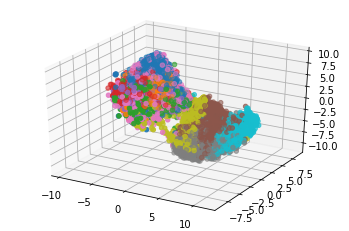

In [52]:
# 2D
# embedded_x, embedded_y = np.split(embedded_samp, 2, axis=1)
# plt.scatter(embedded_x, embedded_y, c=clist)

# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

embedded_x, embedded_y, embedded_z = np.split(embedded_flat_samp, 3, axis=1)
ax.scatter3D(embedded_x, embedded_y, embedded_z, c=clist)

In [67]:
model_json = loaded_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
def get_vec(ind):
    pred = encoder.predict(np.expand_dims(np.expand_dims(sample_x[ind], axis=2), axis=0))
    vec = np.reshape(pred, 512)
    vec /= np.linalg.norm(vec)
    return vec

In [ ]:
def similarity(ind0, ind1):
    print(f"Class 0: {sample_y[ind0]}")
    print(f"Class 1: {sample_y[ind1]}")
    print(get_vec(ind0)@get_vec(ind1))

In [ ]:
interact(similarity,ind0=widgets.IntSlider(min=0, max=19, step=1, value=5),ind1=widgets.IntSlider(min=0, max=19, step=1, value=5))

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [ ]:
vecs = np.array([get_vec(i) for i in range(20)])
(vecs @ vecs.T).shape
plt.matshow(vecs @ vecs.T)
_ = plt.xticks(np.arange(20), sample_y[:20])
_ = plt.yticks(np.arange(20), sample_y[:20])

In [ ]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, batch_size=32, dim=(16, 200), n_channels=1, shuffle=True):
        'Initialization'
        self.files = []
        self.indexes = None
        self.dim = dim
        self.batch_size = batch_size
        self.n_channels = n_channels
        self.shuffle = shuffle

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.files)/self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        files_temp = [self.files[k] for k in indexes]

        # Generate data
        X = self.__load_files(files_temp)

        return X, X
    
    def load_directory(self, directory, extension="npy"):
        orig_len = len(self.files)
        self.files.extend([os.path.join(directory, x) for x in os.listdir(directory) if x.endswith(extension)])
        self.files = list(set(self.files))
        print("%d files added" % (len(self.files) - orig_len))
        print("%d files in total" % len(self.files))
        if self.shuffle:
            random.shuffle(self.files)
        self.indexes = np.arange(len(self.files))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle:
            random.shuffle(self.files)

    def __load_files(self, files):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data
        for i, file in enumerate(files):
            # Store sample
            X[i,] = np.expand_dims(np.load(file), axis=2)

        return X

In [ ]:
filtered_dir = "GBT_57532_09539_HIP56445_fine/filtered"
data_gen = DataGenerator()

In [ ]:
for i in range(3):
    data_gen.load_directory(filtered_dir+"/"+str(i))

In [ ]:
input_img = Input(shape=(16, 200, 1))
x = Conv2D(32, (2, 2), activation="relu", padding="same")(input_img)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(x)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(encoded)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(x)
x = Conv2D(32, (2, 2), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (2, 2), padding="same")(x)

model = Model(inputs=input_img, outputs=decoded)


In [ ]:
encoder = Model(inputs=input_img, outputs=encoded)

In [ ]:
class DataShuffleCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        data_gen.on_epoch_end()
    

In [ ]:
model.compile("adam", loss="mse")

In [ ]:
model.fit_generator(generator=data_gen, epochs=5, use_multiprocessing=True, workers=4, callbacks=[DataShuffleCallback()])

In [ ]:
test_data = data_gen.__getitem__(2)

In [ ]:
pred = model.predict(test_data[0])

In [ ]:
encoded_pred = encoder.predict(test_data[0])

In [ ]:
encoded_pred.shape

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
def foo(ind):
    plt.figure()
    plt.title("ground truth")
    plt.imshow(np.squeeze(test_data[0][ind]))
    pred0 = np.squeeze(pred[ind])
    plt.figure()
    plt.title("prediction")
    plt.imshow(pred0)
    
interact(foo,ind=widgets.IntSlider(min=0, max=31, step=1, value=5))